In [1]:
import pandas as pd
import numpy as np
import itertools as it
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
lotto = pd.read_csv('lotto2024.csv', index_col = False)
lotto.head()

,Draw Date,Winning Numbers,Jackpot Prize (Php)
0,"Dec 31, 2024",11-40-20-12-19-01,"290,664,568.00"
1,"Dec 29, 2024",37-45-05-03-30-56,"281,445,485.60"
2,"Dec 27, 2024",55-21-02-19-28-15,"270,763,112.80"
3,"Dec 24, 2024",38-13-14-06-17-51,"259,406,932.80"
4,"Dec 22, 2024",42-20-04-48-06-49,"251,299,365.20"


reading the csv file and then showing the first five rows

In [3]:
winNum = pd.DataFrame(lotto["Winning Numbers"].str.split('-').tolist())
winNum=winNum.apply(pd.to_numeric, errors='coerce')

In [4]:
sorted_winNum = winNum.apply(lambda x: x.sort_values().reset_index(drop = True)).transpose()
counts  = pd.Series(winNum.values.tolist()).value_counts()
display(counts)

[11.0, 40.0, 20.0, 12.0, 19.0, 1.0]     1
[31.0, 7.0, 48.0, 15.0, 45.0, 47.0]     1
[51.0, 56.0, 6.0, 38.0, 54.0, 39.0]     1
[35.0, 11.0, 9.0, 40.0, 55.0, 19.0]     1
[4.0, 48.0, 28.0, 17.0, 22.0, 33.0]     1
                                       ..
[41.0, 44.0, 52.0, 8.0, 3.0, 40.0]      1
[40.0, 53.0, 24.0, 45.0, 50.0, 10.0]    1
[9.0, 2.0, 51.0, 5.0, 6.0, 42.0]        1
[39.0, 46.0, 7.0, 23.0, 45.0, 44.0]     1
[58.0, 7.0, 40.0, 9.0, 56.0, 29.0]      1
Name: count, Length: 157, dtype: int64

and as expected the there no 6 number combination that shown twice

In [11]:
merged_winNum  = winNum.values.flatten().tolist()
maxNumber = max(merged_winNum, key=merged_winNum.count)

In [6]:
import statistics
mode = statistics.mode(merged_winNum)
print(mode) #gets the top number

56.0


In [7]:
from collections import Counter
print(Counter(merged_winNum).most_common(11)) 

[(56.0, 26), (5.0, 25), (40.0, 24), (58.0, 22), (10.0, 21), (1.0, 20), (37.0, 20), (30.0, 20), (17.0, 20), (51.0, 20), (44.0, 20)]


this gets the top 11 numbers but I only did because I noticed the top 5 in tied between 6 numbers

In [8]:
chart = Counter(merged_winNum).most_common(11)
display(chart)

[(56.0, 26),
 (5.0, 25),
 (40.0, 24),
 (58.0, 22),
 (10.0, 21),
 (1.0, 20),
 (37.0, 20),
 (30.0, 20),
 (17.0, 20),
 (51.0, 20),
 (44.0, 20)]

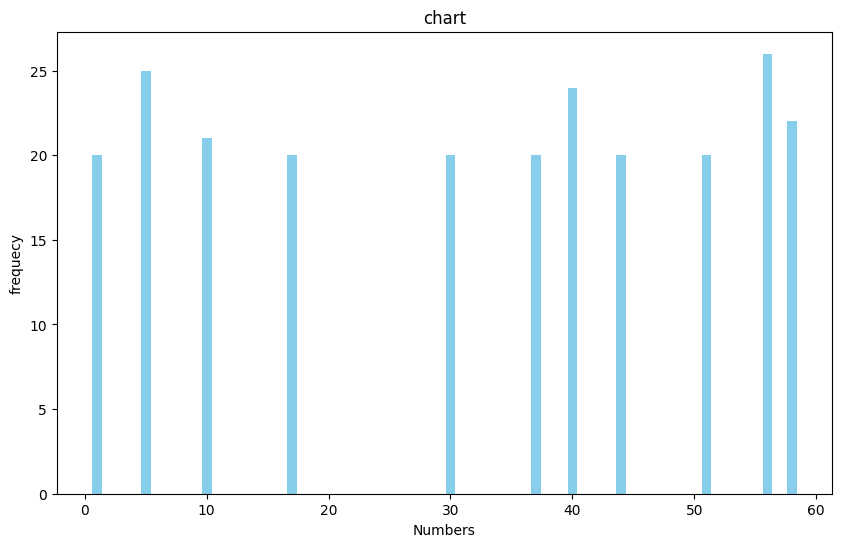

In [9]:
# Separate data into x and y values
x_values = [item[0] for item in chart]
y_values = [item[1] for item in chart]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='skyblue')

# Add labels and title
plt.xlabel('Numbers')
plt.ylabel('frequecy')
plt.title('chart')

# Display the plot
plt.show()

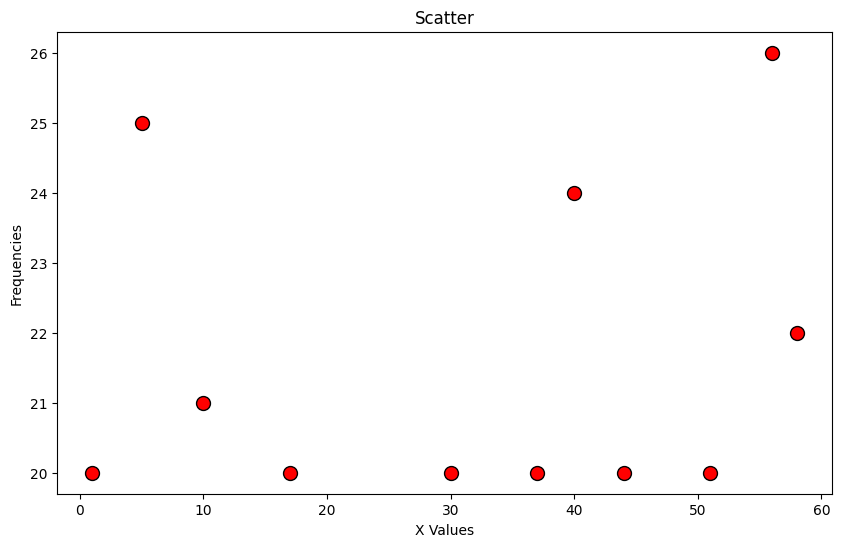

In [10]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='red', edgecolor='black', s=100)

# Add labels and title
plt.xlabel('X Values')
plt.ylabel('Frequencies')
plt.title('Scatter')

# Display the plot
plt.show()